<h1 align=center> Breast Cancer Prediction </h1>

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score,train_test_split

In [2]:
data = pd.read_csv('./cell_samples.csv')
data.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


Clump - Clump thickness of cells

Unifsize - Uniformity of cell size

unifshape - Uniformity of cell shape

MargAdh - Marginal adhesion

Singepisize - Single epithelial cell size

Barenuc - Bare nuclei

Blandchrom - Bland chromatin

Normnucl - Normal nucleoli

Mit - Mitoses

Class - 2-Benign(non-cancerous), 4-Malignant(cancerous)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [4]:
data.BareNuc.unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [5]:
data.BareNuc= data.BareNuc.replace('?',np.nan)

In [6]:
data.dropna(inplace=True)

In [7]:
data.BareNuc = data.BareNuc.astype(dtype=int)

In [8]:
data.drop(columns='ID',inplace=True)

In [9]:
data.isnull().mean()*100

Clump          0.0
UnifSize       0.0
UnifShape      0.0
MargAdh        0.0
SingEpiSize    0.0
BareNuc        0.0
BlandChrom     0.0
NormNucl       0.0
Mit            0.0
Class          0.0
dtype: float64

In [10]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values

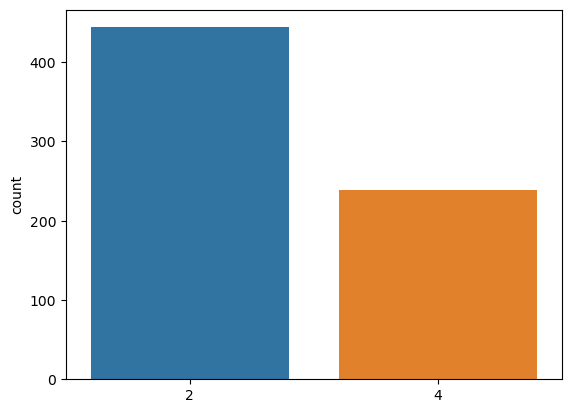

In [11]:
sns.countplot(x=Y)
plt.show()

In [12]:
# treating class imbalance
X,Y = SMOTE().fit_resample(X,Y)

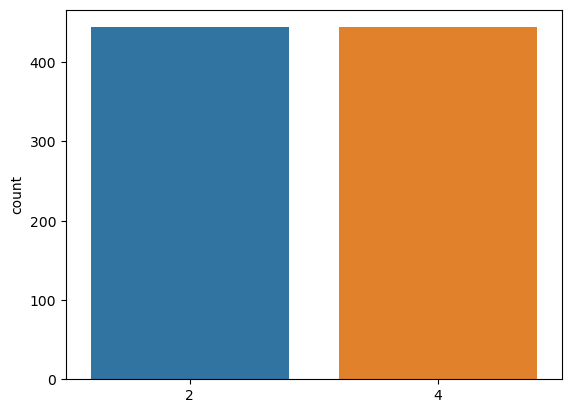

In [13]:
sns.countplot(x=Y)
plt.show()

In [14]:
models = {
    "LogisticRegression":LogisticRegression(),
    "RandomForestClassifier":RandomForestClassifier(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "AdaBoostClassifier":AdaBoostClassifier(),
    "GradientBoostingClassifier":GradientBoostingClassifier(),
    "KNeighborsClassifier":KNeighborsClassifier()
}

In [15]:
for name,model in models.items():
    scores = cross_val_score(model,X,Y,scoring="accuracy",n_jobs=-1,cv=10)
    print("Cross validation model {}".format(name))
    print("Mean score:",np.mean(scores)*100)
    print("*"*100)

Cross validation model LogisticRegression
Mean score: 96.84627170582226
****************************************************************************************************
Cross validation model RandomForestClassifier
Mean score: 97.75025536261491
****************************************************************************************************
Cross validation model DecisionTreeClassifier
Mean score: 95.27323799795711
****************************************************************************************************
Cross validation model AdaBoostClassifier
Mean score: 96.8488253319714
****************************************************************************************************
Cross validation model GradientBoostingClassifier
Mean score: 97.5268130745659
****************************************************************************************************
Cross validation model KNeighborsClassifier
Mean score: 97.97497446373849
***********************************************

#### Selecting KNeighborsClassifier

In [16]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42,shuffle=True)

In [17]:
Model = KNeighborsClassifier()

In [18]:
Model.fit(X_train,Y_train)
print("Model trained with KNeighborsClassifier")
train_score = accuracy_score(Y_train,Model.predict(X_train))
test_score = accuracy_score(Y_test,Model.predict(X_test))
conf_train = confusion_matrix(Y_train,Model.predict(X_train))
conf_test = confusion_matrix(Y_test,Model.predict(X_test))
print("Model training accuracy :",train_score)
print("Model testing accuracy :",test_score)
print("Confusion Matrix train :",conf_train)
print("Confusion matrix test :",conf_test)
print("Wrong predictions made :",((Y_test !=Model.predict(X_test)).sum(),'/',
                                 ((Y_test == Model.predict(X_test)).sum()+
                                  (Y_test != Model.predict(X_test)).sum())))

Model trained with KNeighborsClassifier
Model training accuracy : 0.9802816901408451
Model testing accuracy : 0.9887640449438202
Confusion Matrix train : [[348  11]
 [  3 348]]
Confusion matrix test : [[84  1]
 [ 1 92]]
Wrong predictions made : (2, '/', 178)


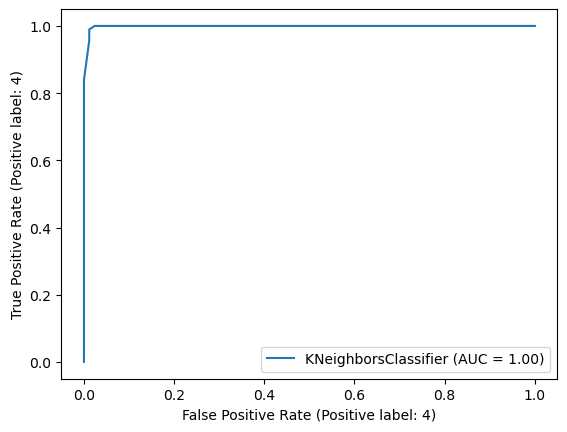

In [19]:
ROC_display = RocCurveDisplay.from_estimator(Model,X_test,Y_test)